In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
### palette
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker
import matplotlib.cm as cm
div_cmap = mplcm.seismic
import cmocean
import numpy.ma as ma
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

### plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0,'/home/albert/lib/python/pyClim')
import xyTools

/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [3]:
%load_ext version_information 
%version_information numpy

Software versions
Python 2.7.11 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.2.0
OS Linux 3.16.0 4 amd64 x86_64 with debian 8.5
numpy 1.11.2
Fri Apr 27 09:58:53 2018 CEST

In [4]:
filesec='/media/extra/DATA/NATL60/NATL60-CJM165-MEAN/NATL60-CJM165_y2012m10-2013m09_sec55W.nc'
ds=xr.open_dataset(filesec)
EKE=ds.voeke
u=ds.vozocrtx_native
nlat=np.squeeze(ds.nav_lat.values)
nlat[-1]=nlat[-2]
dep=ds.deptht
depu=ds.depu3d
depsec=np.zeros(nlat.shape)
for i in np.arange(depsec.shape[0]):
    iend=np.where(np.isnan(np.squeeze(EKE[0,:,0,i])))
    depsec[i]=depu[0,iend[0][0]-1,0,i]

In [5]:
data=sio.loadmat('/media/extra/DATA/HYCOM/A20_U_EKE_50W/A02_E028_55W_Y16_20_annmn.mat')
hn=data['hn']
tke=data['ken']
coord=sio.loadmat('/media/extra/DATA/HYCOM/A20_U_EKE_50W/xyz_A02.mat')
lat=coord['plat']
u2=data['unc2']
v2=data['vnc2']
ndep=coord['pdep']
eke=tke-(u2*u2+v2*v2)/2
zz=np.cumsum(hn,1)-hn/2
yy=np.matlib.repmat(lat,1,32)
aa=np.zeros(eke.shape)
aa[:]=eke[:]
aa[np.where(hn<1.0)]=np.nan
bb=np.zeros(u2.shape)
bb[:]=u2[:]
bb[np.where(hn<1.0)]=np.nan

for i in np.arange(1037):
    iend=np.where(np.isnan(aa[i,:])==True)
    aa[i,iend[0][0]]=aa[i,iend[0][0]-1]
    bb[i,iend[0][0]]=bb[i,iend[0][0]-1]

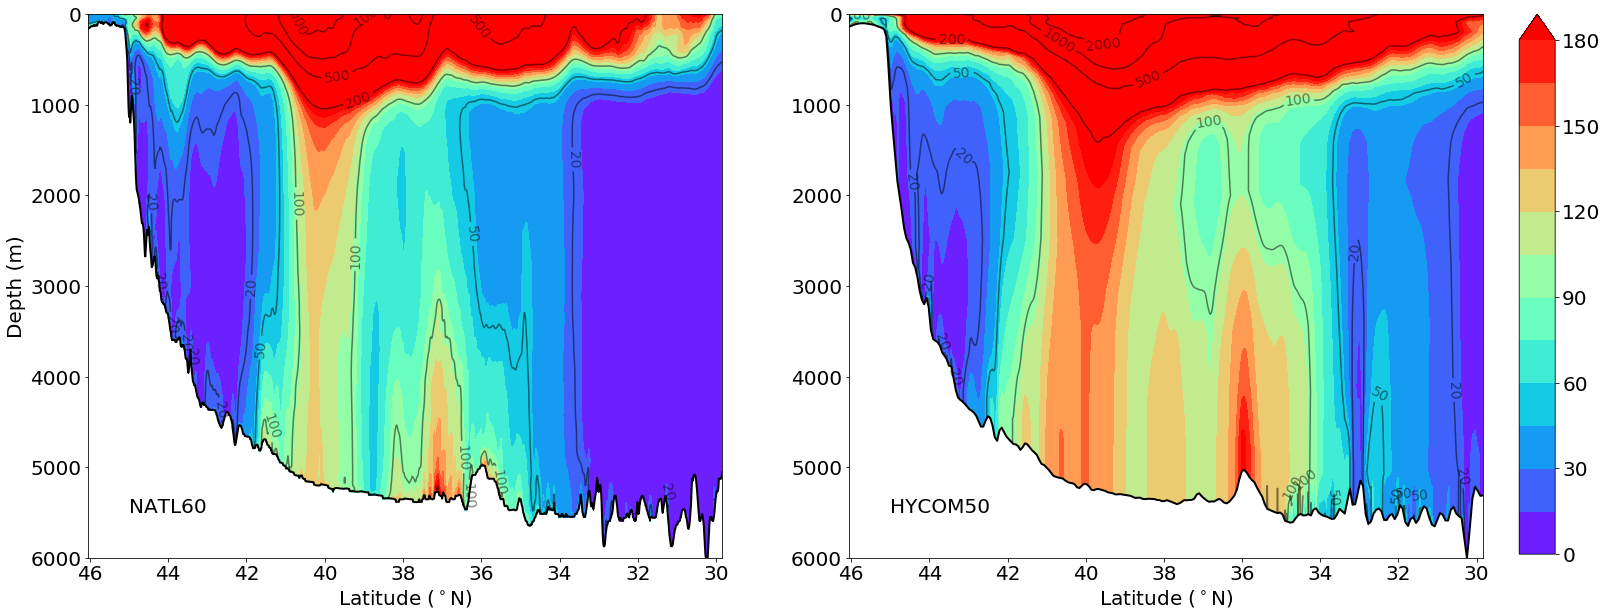

In [11]:
fig = plt.figure(figsize=(25,10))
ax = plt.subplot(121)
cmap=plt.get_cmap('rainbow')
pcolor=plt.contourf(np.squeeze(nlat),dep,1e4*ma.masked_invalid(np.squeeze(EKE)),np.arange(0,195,15),cmap=cmap, extend='max')
contour=ax.contour(np.squeeze(nlat),dep,1e4*ma.masked_invalid(np.squeeze(EKE)),[20,50,100,200,500,1000,2000],colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)
plt.clabel(contour, fmt='%i', colors='k', fontsize=14)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
ax.set_ylabel('Depth (m)',fontsize=20)
ax.set_xlabel('Latitude ($^\circ$N)',fontsize=20)
ax.tick_params(labelsize=20)
ax.set_ylim(6000,0)
#cbar=plt.colorbar()
#cbar.ax.tick_params(labelsize=20)
#plt.title('NATL60 mean EKE',fontsize=20)
plt.text(45, 5500,'NATL60',fontsize=20)
plt.plot(nlat,depsec,color='k',linewidth='2')

ax = plt.subplot(122)
cmap=plt.get_cmap('rainbow')
pcolor=plt.contourf(yy.T,zz.T,1e4*aa.T,np.arange(0,195,15),cmap=cmap, extend='max')
contour=ax.contour(yy.T,zz.T,1e4*aa.T,[20,50,100,200,500,1000,2000],colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)
plt.clabel(contour, fmt='%i', colors='k', fontsize=14)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
#ax.set_ylabel('Depth (m)',fontsize=20)
ax.set_xlabel('Latitude ($^\circ$N)',fontsize=20)
ax.tick_params(labelsize=20)
ax.set_ylim(6000,0)
#cbar=plt.colorbar()
#cbar.ax.tick_params(labelsize=20)
plt.text(45, 5500,'HYCOM50',fontsize=20)
#plt.title('HYCOM50 mean EKE',fontsize=20)
plt.plot(lat,ndep,color='k',linewidth='2')

cbar_ax = fig.add_axes([0.92, 0.13, 0.02, 0.75])
cbar=fig.colorbar(pcolor, cax=cbar_ax, extend='both', orientation="vertical")
cbar.ax.tick_params(labelsize=20) 

plt.savefig('sec55W_NATL60-HYCOM50_meanEKE.png',bbox_inches='tight')

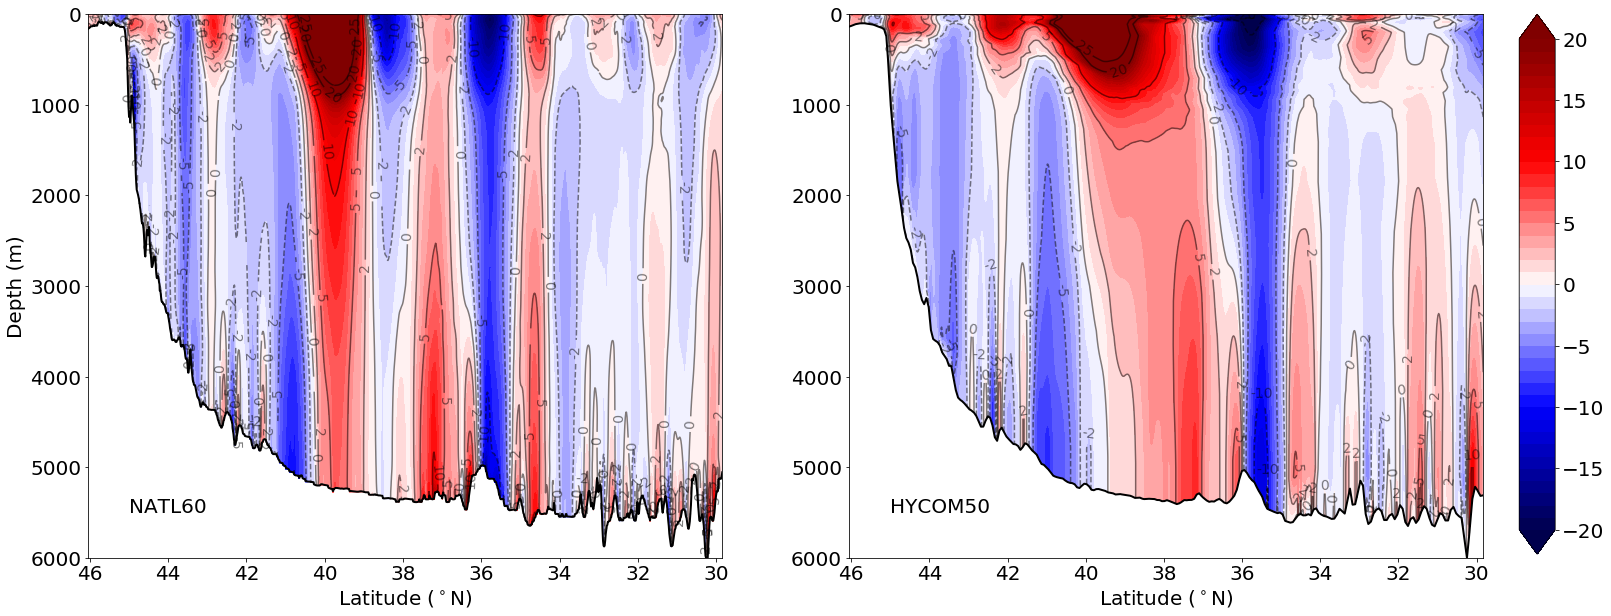

In [12]:
fig = plt.figure(figsize=(25,10))
ax = plt.subplot(121)
cmap=cmocean.cm.balance
pcolor=plt.contourf(np.squeeze(nlat),dep,1e2*ma.masked_invalid(np.squeeze(u)),np.arange(-20,21,1),cmap='seismic', extend='both')
contour=ax.contour(np.squeeze(nlat),dep,1e2*ma.masked_invalid(np.squeeze(u)),[-25,-20,-10,-5,-2,0,2,5,10,20,25],colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)
plt.clabel(contour, fmt='%i', colors='k', fontsize=14)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
ax.set_ylabel('Depth (m)',fontsize=20)
ax.set_xlabel('Latitude ($^\circ$N)',fontsize=20)
ax.tick_params(labelsize=20)
ax.set_ylim(6000,0)
#cbar=plt.colorbar()
#cbar.ax.tick_params(labelsize=20)
#plt.title('NATL60 mean U',fontsize=20)
plt.text(45, 5500,'NATL60',fontsize=20)
plt.plot(nlat,depsec,color='k',linewidth='2')

ax = plt.subplot(122)
cmap=cmocean.cm.balance
pcolor=plt.contourf(yy.T,zz.T,1e2*bb.T,np.arange(-20,21,1),cmap='seismic', extend='both')
contour=ax.contour(yy.T,zz.T,1e2*bb.T,[-25,-20,-10,-5,-2,0,2,5,10,20,25],colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)
plt.clabel(contour, fmt='%i', colors='k', fontsize=14)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
#ax.set_ylabel('Depth (m)',fontsize=20)
ax.set_xlabel('Latitude ($^\circ$N)',fontsize=20)
ax.tick_params(labelsize=20)
ax.set_ylim(6000,0)
#cbar=plt.colorbar()
#cbar.ax.tick_params(labelsize=20)
plt.text(45, 5500,'HYCOM50',fontsize=20)
#plt.title('HYCOM50 mean U',fontsize=20)
plt.plot(lat,ndep,color='k',linewidth='2')


cbar_ax = fig.add_axes([0.92, 0.13, 0.02, 0.75])
cbar=fig.colorbar(pcolor, cax=cbar_ax, extend='both', orientation="vertical")
cbar.ax.tick_params(labelsize=20) 

plt.savefig('sec55W_NATL60-HYCOM50_meanU.png')

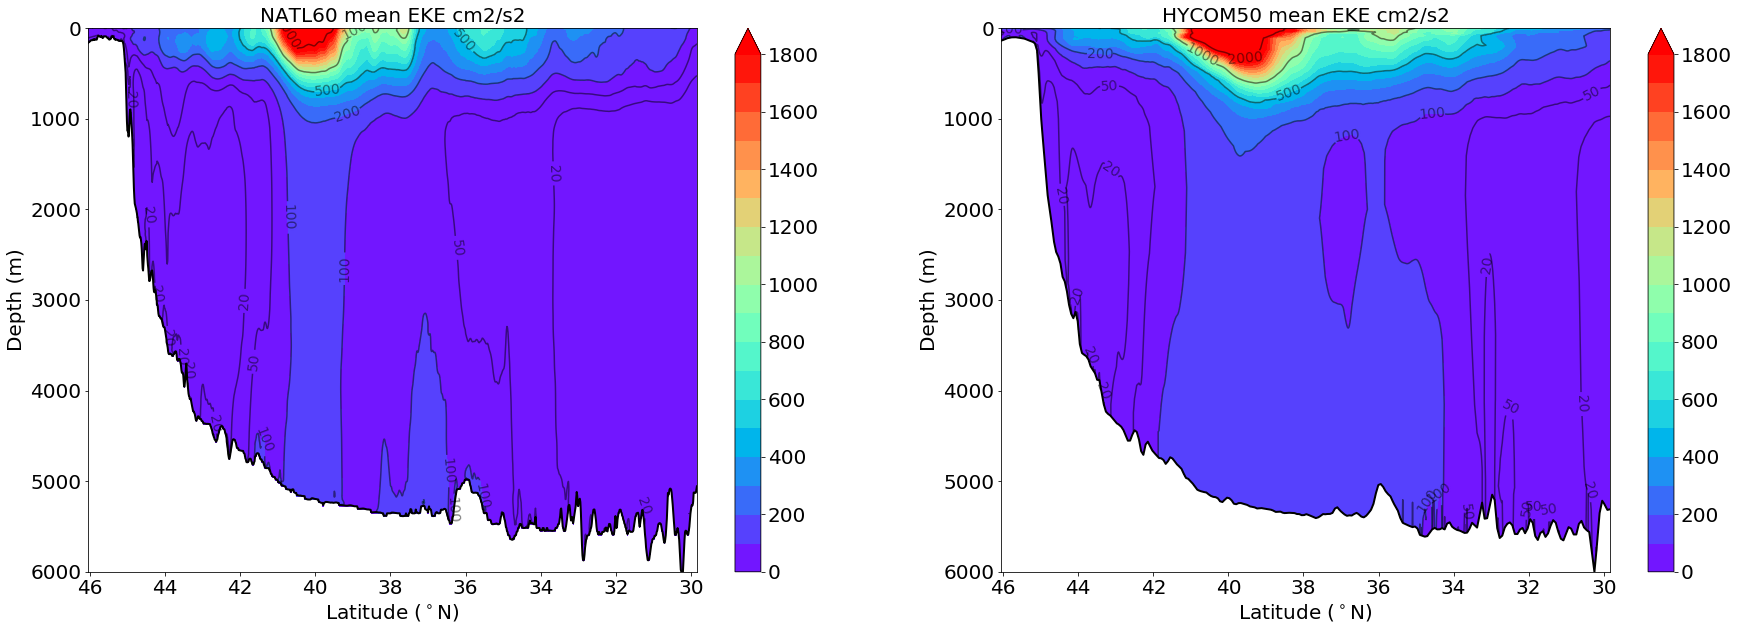

In [8]:
fig = plt.figure(figsize=(30,10))
ax = plt.subplot(121)
cmap=plt.get_cmap('rainbow')
pcolor=plt.contourf(np.squeeze(nlat),dep,1e4*ma.masked_invalid(np.squeeze(EKE)),np.arange(0,1900,100),cmap=cmap, extend='max')
contour=ax.contour(np.squeeze(nlat),dep,1e4*ma.masked_invalid(np.squeeze(EKE)),[20,50,100,200,500,1000,2000],colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)
plt.clabel(contour, fmt='%i', colors='k', fontsize=14)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
ax.set_ylabel('Depth (m)',fontsize=20)
ax.set_xlabel('Latitude ($^\circ$N)',fontsize=20)
ax.tick_params(labelsize=20)
ax.set_ylim(6000,0)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.title('NATL60 mean EKE cm2/s2',fontsize=20)
plt.plot(nlat,depsec,color='k',linewidth='2')

ax = plt.subplot(122)
cmap=plt.get_cmap('rainbow')
pcolor=plt.contourf(yy.T,zz.T,1e4*aa.T,np.arange(0,1900,100),cmap=cmap, extend='max')
contour=ax.contour(yy.T,zz.T,1e4*aa.T,[20,50,100,200,500,1000,2000],colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)
plt.clabel(contour, fmt='%i', colors='k', fontsize=14)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
ax.set_ylabel('Depth (m)',fontsize=20)
ax.set_xlabel('Latitude ($^\circ$N)',fontsize=20)
ax.tick_params(labelsize=20)
ax.set_ylim(6000,0)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=20)
plt.title('HYCOM50 mean EKE cm2/s2',fontsize=20)
plt.plot(lat,ndep,color='k',linewidth='2')

plt.savefig('sec55W_NATL60-HYCOM50_meanEKE_high_values.png')